<a href="https://colab.research.google.com/github/lail-lei/AML/blob/main/project2/lailei_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Pandas and Create DataFrame**

In [204]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd


# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np


# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Read raw file from github into a dataframe
# forrest_fire data 
df = pd.read_csv('https://raw.githubusercontent.com/lail-lei/AML/main/project2/epi_r.csv')

# **Data Preparation 1**
 
*  Removed irrelevant atttributes.  
*  Duplicate recipes deleted.  
*  Missing values replaced with median value.
*  Removed 98th percentile outliers
*  Normalized data using log10.
*  As an alternative to normalization, tried scaling data (using standard scaler and min max). 



## **Remove Irrelevant Attributes**

In [205]:
# drop all columns except for relevant ones
df.drop(df.columns.difference(['title','rating','calories', 'protein', 'fat', 'sodium', 'bake', 'birthday', 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "kid-friendly", "low cal", "no-cook", "peanut free", "quick & easy", "thanksgiving"]), 1, inplace=True)

In [206]:
# Check the dimensionality of the dataframe
df.shape

(20052, 19)

In [207]:
# Get basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         20052 non-null  object 
 1   rating        20052 non-null  float64
 2   calories      15935 non-null  float64
 3   protein       15890 non-null  float64
 4   fat           15869 non-null  float64
 5   sodium        15933 non-null  float64
 6   #cakeweek     20052 non-null  float64
 7   bake          20052 non-null  float64
 8   birthday      20052 non-null  float64
 9   cake          20052 non-null  float64
 10  christmas     20052 non-null  float64
 11  dairy free    20052 non-null  float64
 12  dessert       20052 non-null  float64
 13  kid-friendly  20052 non-null  float64
 14  low cal       20052 non-null  float64
 15  no-cook       20052 non-null  float64
 16  peanut free   20052 non-null  float64
 17  quick & easy  20052 non-null  float64
 18  thanksgiving  20052 non-nu

## **Find and Remove Duplicate Recipes**

In [208]:
# Find out how many duplicate rows exist in data frame (same title, nutritional values, rating, and classifications)
df.duplicated(keep='first').sum()

1810

There are 1810 duplicated recipes.

There should be 18242 unique recipes.

In [209]:
# Drop duplicate values
# Keep first instance of recipe, all after are discarded
df.drop_duplicates(keep='first',inplace=True)

In [210]:
# Check new dimensions of data frame. This checks out.
df.shape

(18242, 19)

## **Missing Data**

In [211]:
# Show how many null values per column 
df.isnull().sum()

title              0
rating             0
calories        3747
protein         3778
fat             3798
sodium          3748
#cakeweek          0
bake               0
birthday           0
cake               0
christmas          0
dairy free         0
dessert            0
kid-friendly       0
low cal            0
no-cook            0
peanut free        0
quick & easy       0
thanksgiving       0
dtype: int64

~3,800 recipes are missing at least 1 nutritional value. Let's create a data frame with only numerical attributes. Then use an imputer to replace all null values with the median of each column.

In [212]:
# Create data frame with only numerical attributes
df_nums = df.drop("title", axis=1)

In [213]:
# Import Imputer to replace null values with median values for that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Train the imputer
imputer.fit(df_nums)

# Transform df_nums
X = imputer.transform(df_nums)

# Create dataframe from transformed array
df_nums_tr = pd.DataFrame(X, columns=df_nums.columns, index=df_nums.index);


## **Visualizing Distributions**

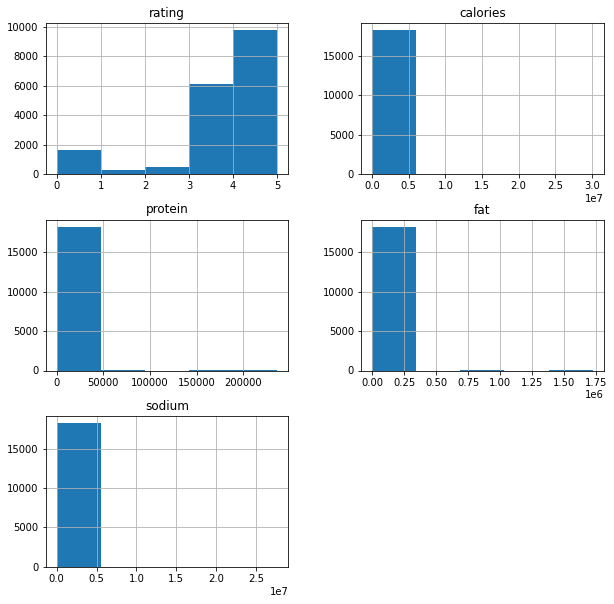

In [214]:
# Visualize distribution of continuous attributes
%matplotlib inline
import matplotlib.pyplot as plt
df_nums_tr.hist(["rating", "calories", "protein", "fat", "sodium"], bins=5, figsize=(10,10))
plt.show()

In [215]:
# Let's describe the data to find the max and min values
df_nums_tr.describe()

,rating,calories,protein,fat,sodium,#cakeweek,bake,birthday,cake,christmas,dairy free,dessert,kid-friendly,low cal,no-cook,peanut free,quick & easy,thanksgiving
count,18242.000000,1.824200e+04,18242.000000,1.824200e+04,1.824200e+04,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000
mean,3.714985,5.335228e+03,75.019406,2.916016e+02,5.288214e+03,0.000329,0.225249,0.009429,0.037112,0.050817,0.159029,0.177283,0.092095,0.052407,0.058162,0.421993,0.266034,0.070223
std,1.332754,3.341687e+05,3127.839920,1.900907e+04,3.106517e+05,0.018133,0.417758,0.096646,0.189042,0.219629,0.365713,0.381919,0.289168,0.222852,0.234057,0.493891,0.441895,0.255529
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.380000e+02,4.000000,1.100000e+01,1.320000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.450000e+02,9.000000,1.800000e+01,3.045000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.170000e+02,21.000000,2.800000e+01,5.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I'm assuming that nutritional data are supposed to be per-serving, and not for the total recipe. Even still, 4-6 servings of a recipe shouldn't have 3.011122e+07 calories.

I will need to get rid of outliers (bad data).  

## **Handling Outliers**

In [216]:
# Get value of 98% quartile
cq = df["calories"].quantile(0.98)
sq = df["sodium"].quantile(0.98)
fq = df["fat"].quantile(0.98)
pq = df["protein"].quantile(0.98)

# Remove outliers where rain is more than 98% quartile
df_nums_tr = df_nums_tr[(df_nums_tr['calories'] < cq) &
                        (df_nums_tr['sodium'] < sq) & 
                        (df_nums_tr['fat'] < fq) & 
                        (df_nums_tr['protein'] < pq)];

df_nums_tr.describe()



,rating,calories,protein,fat,sodium,#cakeweek,bake,birthday,cake,christmas,dairy free,dessert,kid-friendly,low cal,no-cook,peanut free,quick & easy,thanksgiving
count,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000
mean,3.706749,402.221773,15.250911,22.091168,437.755748,0.000228,0.225700,0.009447,0.036649,0.048828,0.159231,0.179832,0.092761,0.053665,0.059868,0.423799,0.270885,0.067038
std,1.336433,275.809938,18.227227,19.903666,498.548732,0.015086,0.418054,0.096737,0.187904,0.215514,0.365901,0.384058,0.290106,0.225362,0.237249,0.494173,0.444430,0.250096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,233.000000,4.000000,10.000000,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,345.000000,9.000000,18.000000,304.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,486.000000,18.000000,26.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.000000,2094.000000,118.000000,140.000000,3536.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


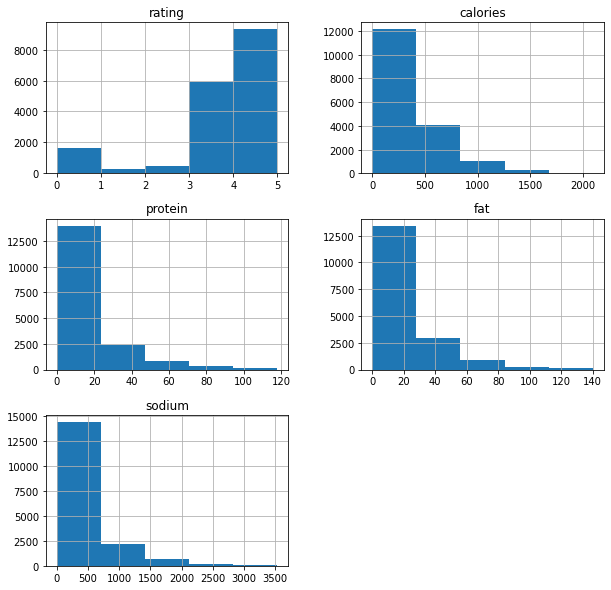

In [217]:
# Visualize distribution of continuous attributes
%matplotlib inline
import matplotlib.pyplot as plt
df_nums_tr.hist(["rating", "calories", "protein", "fat", "sodium"], bins=5, figsize=(10,10))
plt.show()

The distributions are still very skewed, but much more acceptable than before we removed outliers. My gut instinct is that the scale was being mostly affected by these outliers. I want to try normalizing the data first, before I standardize the scale.

## **Normalized Data**

In [218]:
# Save columns to be normalized
norm_calories = pd.DataFrame(df_nums_tr["calories"])
norm_sodium = pd.DataFrame(df_nums_tr["sodium"])
norm_protein = pd.DataFrame(df_nums_tr["protein"])
norm_fat = pd.DataFrame(df_nums_tr["fat"])
norm_rating = pd.DataFrame(df_nums_tr["rating"])


# Normalize the data using np log method (natural log). 
# Used a constant + 1 because the area contains many zeros and using a logarithm translation. 
norm_calories = np.log10(norm_calories + 1)
norm_sodium = np.log10(norm_sodium + 1)
norm_protein = np.log10(norm_protein + 1)
norm_fat = np.log10(norm_fat + 1)
norm_rating = np.log10(norm_rating + 1)

data = [norm_rating, norm_calories, norm_sodium, norm_protein, norm_fat, df_nums_tr["bake"], df_nums_tr["birthday"], df_nums_tr["cake"], df_nums_tr["#cakeweek"], df_nums_tr["christmas"], df_nums_tr["dairy free"], df_nums_tr["dessert"], df_nums_tr["kid-friendly"], df_nums_tr["low cal"], df_nums_tr["no-cook"], df_nums_tr["peanut free"], df_nums_tr["quick & easy"], df_nums_tr["thanksgiving"]]





In [219]:
# create a new DataFrame containing all normalized values
prepared = pd.concat(data, axis=1)
prepared.describe()

,rating,calories,sodium,protein,fat,bake,birthday,cake,#cakeweek,christmas,dairy free,dessert,kid-friendly,low cal,no-cook,peanut free,quick & easy,thanksgiving
count,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000
mean,0.637294,2.504614,2.333837,0.991003,1.191204,0.225700,0.009447,0.036649,0.000228,0.048828,0.159231,0.179832,0.092761,0.053665,0.059868,0.423799,0.270885,0.067038
std,0.211482,0.327938,0.641564,0.446338,0.448779,0.418054,0.096737,0.187904,0.015086,0.215514,0.365901,0.384058,0.290106,0.225362,0.237249,0.494173,0.444430,0.250096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.676694,2.369216,2.096910,0.698970,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.730378,2.539076,2.485011,1.000000,1.278754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730378,2.687529,2.717671,1.278754,1.431364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.778151,3.321184,3.548635,2.075547,2.149219,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


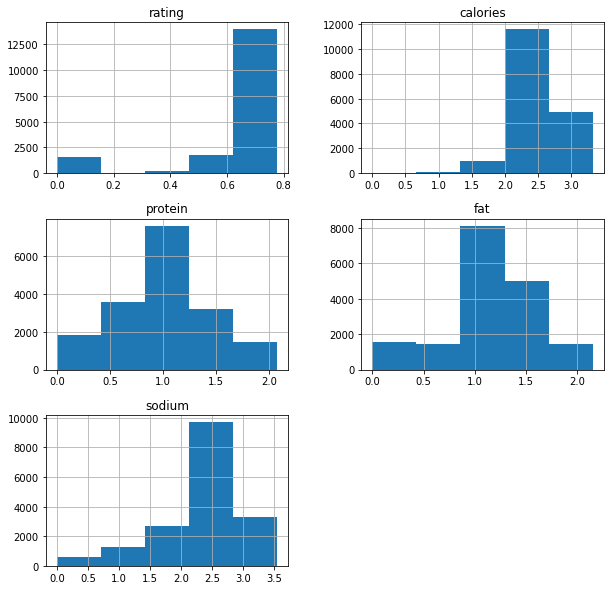

In [220]:
# now let's visualize our prepared data frame
prepared.hist(["rating", "calories", "protein", "fat", "sodium"], bins=5, figsize=(10,10))
plt.show()

Those distributions look much better! I think using just normalized data might be enough to run this module's experiements, but to be sure, let's try scaling our data instead. 

## **Scaled Data**

As an alternative to normalizing, let's scale the scrubbed data and visualize the distributions.

### Standard Scaler

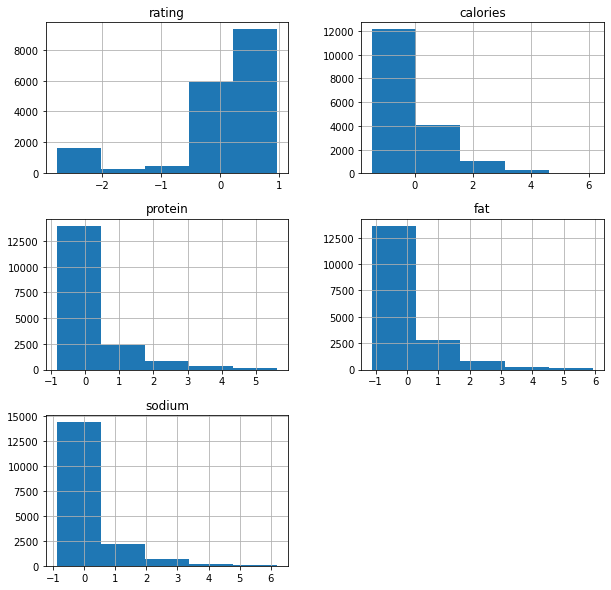

In [221]:
# import our pipeline 
from sklearn.pipeline import Pipeline
# import our standard scaler 
from sklearn.preprocessing import StandardScaler

# create pipeline
# would use imputer here, but already did it a few steps above
num_pipeline = Pipeline([("std_scaler", StandardScaler())])

# get numpy array of scaled data
scaled = num_pipeline.fit_transform(df_nums_tr)
# turn to data frame
scaled = pd.DataFrame(scaled, columns=df_nums_tr.columns, index=df_nums_tr.index);

# visualize 
scaled.hist(["rating", "calories", "protein", "fat", "sodium"], bins=5, figsize=(10,10))
plt.show()


The standard scaler doesn't seem to help the distribution as much as the normalizer. Let's try another scaler 

### Min Max Scaler

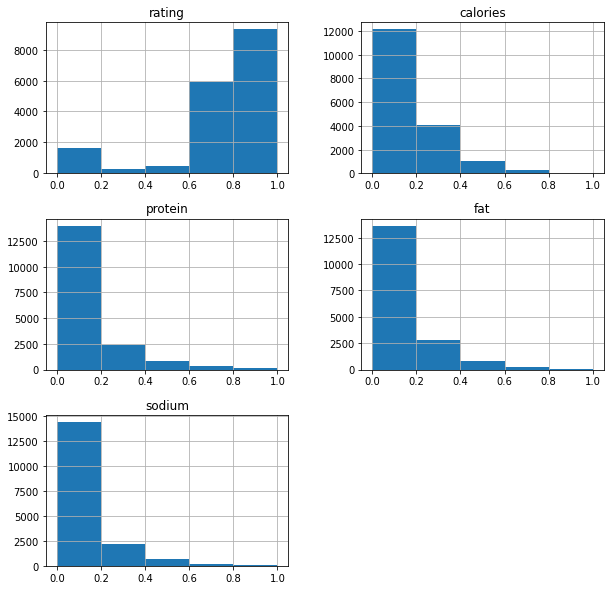

In [222]:
# import our pipeline 
from sklearn.pipeline import Pipeline
# import our min max scaler 
from sklearn.preprocessing import MinMaxScaler

# create pipeline
# would use imputer here, but already did it a few steps above
num_pipeline = Pipeline([("min_max_scaler", MinMaxScaler())])

# get numpy array of scaled data
scaled = num_pipeline.fit_transform(df_nums_tr)
# turn to data frame
scaled = pd.DataFrame(scaled, columns=df_nums_tr.columns, index=df_nums_tr.index);

# visualize 
scaled.hist(["rating", "calories", "protein", "fat", "sodium"], bins=5, figsize=(10,10))
plt.show()


The min max scaler seems affects the distribution about as much as the standard scaler. I think the best option is to perform PCA and logistic regression on the normalized data rather than the scaled data.

# **Pearson's Correlation 1**
Looked at the relationship between rating and normalized continous attributes (nutritional values).

In [223]:
# We want to see the correlation only between rating and continuous attributes
continuous = prepared[['rating', 'calories', 'protein', 'fat', 'sodium']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["rating"].sort_values(ascending=False)


rating      1.000000
fat         0.192250
protein     0.185152
sodium      0.169159
calories    0.136014
Name: rating, dtype: float64

It seems like fat and protein have the strongest correlation with recipe rating. This makes sense to me, because people like butter and people like meat. Conversely, a recipe that is low in fat and low in protein is likely to contain more vegetables, right? It might be less filling and less popular with people. 

# **PCA 1**
Performed PCA on normalized dataset of continuous attributes (nutritional values)

In [224]:

from sklearn.decomposition import PCA

# PCA with reduced dimensionalty to 2 
pca1 = PCA(n_components=5)
pca1.fit(continuous)

# perform PCA without reducing dimensionality
# select all components that explain 95% of the variance
pca2 = PCA()
# fit to prepared data
pca2.fit(continuous)
# compute the minimum number of dimensions required to preserve 95% of data's variance
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its first 2 principal components
x_pca1 = pca1.transform(continuous)

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(continuous)



In [225]:

# Let's examine the results
print ('Prepared data shape: ', continuous.shape)
print ('Transformed data shape: ', x_pca1.shape)
print ('Explained variance by 2 components: ', pca1.explained_variance_ratio_)
print ('# Components explaining 95% of variance: ', d)

Prepared data shape:  (17572, 5)
Transformed data shape:  (17572, 5)
Explained variance by 2 components:  [0.71763127 0.14963166 0.05818169 0.04466234 0.02989303]
# Components explaining 95% of variance:  4


**4 components explain 95% of the data set's variance. One component contributes ~72% to the variance!**



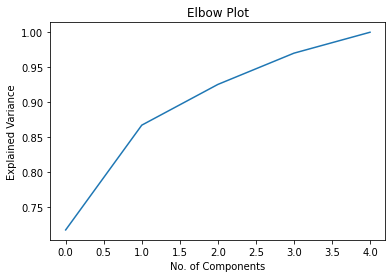

In [226]:
# The elbow plot of the explained variance

plt.plot(cumsum)
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

# **Logistic Regression 1**
Performed Logistic Regression for 
* the tag "#cakeweek" using normalized continuous data
* the tag "cake" using normalized continuous data
* the tag "cake" using normalized continuous data and additional recipe tags
* the most-frequently occuring recipe tag, "peanut free"
* another frequently occuring recipe tag, "dessert"

### **Logistic Regression for #cakeweek**

In [305]:
from sklearn.model_selection import train_test_split

# need to use continuous data for x 
X = continuous

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["#cakeweek"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not #cakeweek) and 1 (#cakeweek)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: #cakeweek (1) vs. not #cakeweek (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,5272,0
1,0,0


It looks like there was no #cakeweek recipes in the test set (5272) when I performed logistic regression on a 70-30 train/test set. This suggests that number of recipes tagged #cakeweek is probably too low to perform logistic regression for this feature. 

In [287]:
# Sum the column to find out how many recipes are tagged  "#cakeweek"

total_cakeweek = prepared["#cakeweek"].sum()
print(total_cakeweek)

# there are only 4 recipes out of 17,572 that are tagged #cakeweek

4.0


**There are only 4 recipes out of 17,572 that are tagged #cakeweek!** 

Let's try again with another classification. The simpler tag "cake" might have more recipes. 

In [288]:
# Sum the column to find out how many recipes are tagged "cake"

total_cake = prepared["cake"].sum()
print(total_cake)

# there are 644 recipes out of 17,572 that are tagged #cakeweek

644.0


###**Logistic Regression for cake (continuous attributes)**
There are 644 recipes out of 17,572 that are tagged cake. This is still a tiny number of recipes (~3%) but much better than #cakeweek. Let's try doing a logistic regression for "cake". 

In [289]:

# need to use continuous data for x 
X = continuous

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["cake"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not cake) and 1 (cake)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: cake (1) vs. not cake (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,5064,6
1,202,0


The logistic regression for cake performed poorly. 

Accuracy: 96%

Recall/sensitivity : 0%

Specificity rate: ~98.8%

Precision: 0%

F1 score: 0.0

It classified 5,064/5,070 non cake recipes as non cake recipes.
It misclassified 6 / 5,070 non cake recipes as cake recipes.

It misclassified all 202 cake recipes as non cake recipes. 

It appears difficult to use fat, protein, calories, and sodium to classify a cake recipe as a cake recipe. 

But what if we included another tag that is related to cakes, but has a more significant number of recipes.


###**Logistic Regression for cake on a custom dataframe including tag dessert**

In [290]:
# add dessert tag to continuous data for x 
continuous_dessert = continuous.copy()
dessert = prepared["dessert"]
continuous_dessert["dessert"] = dessert

X = continuous_dessert;

# labels 
Y = prepared["cake"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not dessert) and 1 (dessert)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: dessert  (1) vs. not dessert (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,5062,8
1,197,5


The logistic regression for cake with a dessert tag performed marginally better than just nutritional information alone. 

It still has an accuracy rate of 96%. It's recall, however, improved from 0% to 2%. It's specificity rate is still around 99.8%. It's precision improved the most, from 0% to around 38%. It's F1 score improved from 0 to ~0.05.

It classified 5,062/5,070 non cake recipes as non cake recipes.
It misclassified 8 / 5,070 non cake recipes as cake recipes.
It misclassified 197 cake recipes as non cake recipes, but correctly identified 5 cake recipes.



###**Logistic Regression for cake on a custom dataframe including many tags**

In [291]:

# custom dataframe
data= [prepared["calories"], prepared["fat"], prepared["sodium"], prepared["dessert"], prepared["bake"], prepared["birthday"], prepared["kid-friendly"]]
cal_fat_dessert = pd.concat(data, axis=1);

X = cal_fat_dessert;

# labels 
Y = prepared["cake"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not cake) and 1 (cake)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: cake (1) vs. not cake (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)








#Total cases (17572, 7)
#Training and testing cases (12300, 7) (5272, 7)
Confusion matrix:


,0,1
0,5059,11
1,176,26


The logistic regression for this custom dataframe performed better than all nutritional values + dessert.

It still has an accuracy rate of 96%. It's recall, however, improved from 2% to ~13%. It's specificity rate is still around 99.8%. It's precision improved the most, from ~38% to 70%. It's F1 score improved significantly from ~0.05 to ~0.22.

It classified 5,059/5,070 non cake recipes as non cake recipes.
It misclassified 11 / 5,070 non cake recipes as cake recipes.
It misclassified 176 cake recipes as non cake recipes, and correctly classified 26 cake recipes. 



### **Find the most frequently occuring recipe tags**
Let's try logistic regression on a larger recipe tag than cake or cakeweek

In [292]:
# choose between bake', 'birthday', 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "kid-friendly", "low cal", "no-cook", "peanut free", "quick & easy", "thanksgiving"
# Sum the column to find out most frequently appearing classification
total = prepared["bake"].sum()
print(total)

3966.0


In [293]:
total = prepared["dairy free"].sum()
print(total)

2798.0


In [294]:
total = prepared["dessert"].sum()
print(total)

3160.0


In [295]:
total = prepared["kid-friendly"].sum()
print(total)

1630.0


In [296]:
total = prepared["no-cook"].sum()
print(total)

1052.0


In [297]:
total = prepared["peanut free"].sum()
print(total)

7447.0


In [298]:
total = prepared["quick & easy"].sum()
print(total)

4760.0


In [299]:
total = prepared["thanksgiving"].sum()
print(total)

1178.0


In [302]:
total = prepared["low cal"].sum()
print(total)

943.0


Peanut free occurs 7,447 times. This appears to be the most frequently used tag amongs the columns I kept. Let's run a logistic regression on peanut free recipes. 

### **Logistic Regression for dessert**
Let's try logistic regression on a larger recipe tag than cake or cakeweek

In [300]:

# need to use continuous data for x 
X = continuous

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["dessert"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not dessert) and 1 (dessert)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: dessert (1) vs. not dessert (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,4140,185
1,809,138


The logistic regression for dessert performed relatively poorly.

Accuracy: ~81%. 

Recall/sensitivity : ~15%

Specificity rate: ~96%

Precision: ~42%

F1 score: ~0.22



### **Logistic Regression for peanut free**
Let's try logistic regression on a larger recipe tag than cake or cakeweek

In [301]:

# need to use continuous data for x 
X = continuous

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["peanut free"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not peanut free) and 1 (peanut free)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: peanut free (1) vs. not peanut free (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,2726,311
1,1868,367


The logistic regression for peanut free performed poorly. It doesn't look like nutritional values can really be used to predict if a recipe is peanut free. 

Accuracy: ~59%. 

Recall/sensitivity : ~16%

Specificity rate: ~89.8%

Precision: ~54%

F1 score: ~0.25





### **Logistic Regression for low cal**
Let's try logistic regression on a larger recipe tag than cake or cakeweek

In [306]:

# need to use continuous data for x 
X = continuous

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["low cal"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not low cal) and 1 (low cal)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: low cal (1) vs. not low cal(0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,4992,0
1,280,0


The logistic regression for low cal performed poorly. While the model could identify what was not a low cal recipe, it couldn't identify any low cal recipes. 

Accuracy: ~95%. 

Recall/sensitivity : 0%

Specificity rate: 100%

Precision: 0%

F1 score: 0



# **Feature Engineering**

## **Defining "healthy"**

It's hard to create "general" criteria for "healthy" recipes based only on the recipe's fat, sodium, calories and protein. I decided to look up the daily recommended intake for protein, calories, sodium and fat. If the daily recommneded intake was different between sexes (e.g., men are recommended 2.5k calories a day and women are recommended 2k), I averaged male/female recommendations. Then, I divided each of the daily recommended intakes by 3, working with the assumption that most recipes are for a meal (not a snack) and that most people eat 3 meals a day. Following these averaged recommendations, a recipe may be considered healthy if it contains no more than:

1. 17 grams of protein 
2. 750 calories 
3. 500 mg of sodium 
4. 25 gms of fat




In [243]:
# Initialize a new column 
prepared["healthy"] = 0;

# need to run log10 on the critera to match the normalized values in continuous attributes
# normalization of continuous attributes = np.log10(value + 1)

logged_protein =  np.log10(17 + 1)
logged_cals = np.log10(750 + 1)
logged_sodium =  np.log10(500 + 1) 
logged_fat =  np.log10(25 + 1)

prepared["healthy"] = np.where(((prepared.fat <= logged_fat) & 
                                (prepared.calories <= logged_cals) & 
                                (prepared.sodium < logged_sodium) & 
                                (prepared.protein < logged_protein) 
                                ),1, prepared.healthy)

prepared.describe()


,rating,calories,sodium,protein,fat,bake,birthday,cake,#cakeweek,christmas,dairy free,dessert,kid-friendly,low cal,no-cook,peanut free,quick & easy,thanksgiving,healthy
count,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000
mean,0.637294,2.504614,2.333837,0.991003,1.191204,0.225700,0.009447,0.036649,0.000228,0.048828,0.159231,0.179832,0.092761,0.053665,0.059868,0.423799,0.270885,0.067038,0.584282
std,0.211482,0.327938,0.641564,0.446338,0.448779,0.418054,0.096737,0.187904,0.015086,0.215514,0.365901,0.384058,0.290106,0.225362,0.237249,0.494173,0.444430,0.250096,0.492859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.676694,2.369216,2.096910,0.698970,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.730378,2.539076,2.485011,1.000000,1.278754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.730378,2.687529,2.717671,1.278754,1.431364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,0.778151,3.321184,3.548635,2.075547,2.149219,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
# Sum healthy column to find out its frequency
total = prepared["healthy"].sum()
print(total)
#10,267 recipes meet the "healthy critera"

10267


## **Pearson's Correlation 2**
Looking at the relationship between rating, nutritional values, and our new healthy category.

In [245]:
# We want to see the correlation only between rating and continuous attributes
continuous_healthy = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["rating"].sort_values(ascending=False)


rating      1.000000
fat         0.192250
protein     0.185152
sodium      0.169159
calories    0.136014
healthy    -0.136349
Name: rating, dtype: float64

It looks like healthy recipes are inversely related to rating- people don't like healthy recipes, but they do like butter!! 

## **Logistic Regression for Healthy**

In [284]:

# need to use continuous data for x 
X = continuous

# labels 
Y = prepared["healthy"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not healthy) and 1 (healthy)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: 0 (not healthy) and 1 (healthy)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 5)
#Training and testing cases (12300, 5) (5272, 5)
Confusion matrix:


,0,1
0,1713,495
1,42,3022


The logistic regression for healthy performed pretty well. It was very good at recognizing healthy recipes as healthy recipes (high sensitivity). It did over classify some unhealthy recipes as healthy (specificity at 77%). 

The model's high performance might make sense, though, as a recipe's healthiness is dependent entirely upon it continuous attributes.

Accuracy rate: ~90%

Recall/sensitivity: ~99%

Specificity rate: ~78% 

Precision: ~86%

F1 score: ~0.92



In [285]:
# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy.corr()

# Create the correlation matrix from our prepared data for healthy attribute
corr_matrix["healthy"].sort_values(ascending=False)


healthy     1.000000
rating     -0.136349
fat        -0.486659
calories   -0.514308
sodium     -0.521983
protein    -0.623568
Name: healthy, dtype: float64

Sodium, protein, fat and calories are all fairly-to-strongly correlated to a recipe's health score. 


## **Logistic Regression for Peanut Free (using healthy)**

In [258]:

# need to use continuous data for x 
X = continuous_healthy

# labels 
Y = prepared["peanut free"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not peanut free) and 1 (peanut free)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: peanut free (1) vs. not peanut free (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)






#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,2672,365
1,1872,363


The logistic regression for peanut free performed about the same when the dataset included the attribute healthy. 

Accuracy rate: ~59%

Recall/sensitivity: 16%

Specificity rate: ~88% 

Precision: ~50%

F1 score: 0.25

### **Pearson's Correlation 3**
Looking at the relationship between peanut free, healthy, and the nutritional values

In [249]:
# We want to see the correlation only between rating and continuous attributes
continuous_healthy_peanut = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy', 'peanut free']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy_peanut.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["peanut free"].sort_values(ascending=False)


peanut free    1.000000
rating         0.104541
fat            0.057505
healthy        0.037586
calories       0.032007
sodium         0.011179
protein       -0.024874
Name: peanut free, dtype: float64

There doesn't seem to be a very strong relationship between the attribute peanut free and any of the nutritional value attributes.

## **Logistic Regression for Dessert (using continous dataset with healthy)**

In [250]:
X = continuous_healthy

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["dessert"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not dessert) and 1 (dessert)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: dessert (1) vs. not dessert (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,4157,168
1,810,137


The logistic regression for dessert peformed about the same when dataset included healthy tag than when it only included nutritional values.

Accuracy: ~81%. 

Recall/sensitivity : ~14%

Specificity rate: ~96%

Precision: ~45%

F1 score: ~0.22


### **Pearson's Correlation 4**
Looking at the relationship between dessert, the tag healthy, and nutritional values

In [251]:
# We want to see the correlation only between rating and continuous attributes
continuous_healthy_dessert = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy', 'dessert']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy_dessert.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["dessert"].sort_values(ascending=False)


dessert     1.000000
healthy     0.151436
calories    0.043674
rating      0.030649
fat        -0.005883
protein    -0.217122
sodium     -0.220005
Name: dessert, dtype: float64

There is a positive relationship between the dessert tag and the "healthy" tag. There is also relatively strong inverse relationships between protien and dessert and sodium and dessert. 

It makes sense that desserts would be low protein as desserts generally don't have meat/protein rich food in them. Desserts are also typically sweet rather than salty, so the more sodium-heavy recipes are probably savory. 

It's interesting that the healthy category is somewhat related to the dessert tag when calories and fat are not. 
My hypothesis is that because desserts tend to score low in sodium and protein, the model is more likely to score them as healthy over recipes that may be equal in calories/fats but contain a lot of meat or salt. I didn't expect a positive relationship between the healthy tag and the dessert tag.  

### **Re-defining "healthy"**
If healthy didn't take in account sodium or protein, how would it affect it's correlation with the dessert tag?

Let's define a new healthy category that gets rid of our sodium and protein requirements. Now, a healthy recipe must only have no more than:
1. 750 calories 
2. 25 gms of fat




In [263]:
# Initialize a new column 
prepared["healthy_calsfats_only"] = 0;

# need to run log10 on the critera to match the normalized values in continuous attributes
# normalization of continuous attributes = np.log10(value) + 1 
prepared["healthy_calsfats_only"] = np.where((prepared.calories < np.log10(750 + 1)) & 
                                              (prepared.fat < np.log10(25 +1)),1, prepared.healthy_calsfats_only)

prepared.describe()


,rating,calories,sodium,protein,fat,bake,birthday,cake,#cakeweek,christmas,dairy free,dessert,kid-friendly,low cal,no-cook,peanut free,quick & easy,thanksgiving,healthy,healthy_calsfats_only
count,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000,17572.000000
mean,0.637294,2.504614,2.333837,0.991003,1.191204,0.225700,0.009447,0.036649,0.000228,0.048828,0.159231,0.179832,0.092761,0.053665,0.059868,0.423799,0.270885,0.067038,0.584282,0.723481
std,0.211482,0.327938,0.641564,0.446338,0.448779,0.418054,0.096737,0.187904,0.015086,0.215514,0.365901,0.384058,0.290106,0.225362,0.237249,0.494173,0.444430,0.250096,0.492859,0.447289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.676694,2.369216,2.096910,0.698970,1.041393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.730378,2.539076,2.485011,1.000000,1.278754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.730378,2.687529,2.717671,1.278754,1.431364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.778151,3.321184,3.548635,2.075547,2.149219,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [264]:
# Sum healthy column to find out its frequency
total = prepared["healthy_calsfats_only"].sum()
print(total)
#12,713 recipes meet the new "healthy critera"

12713


### **Pearson's correlation 5 and logistic regression** 

In [282]:
# We want to see the correlation only between dessert, heathly, and continuous attributes
continuous_healthy_2_dessert = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy_calsfats_only', 'dessert']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy_2_dessert.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["dessert"].sort_values(ascending=False)


dessert                  1.000000
calories                 0.043674
rating                   0.030649
healthy_calsfats_only    0.015174
fat                     -0.005883
protein                 -0.217122
sodium                  -0.220005
Name: dessert, dtype: float64

As predicted, when sodium and protein are removed from the definition of healthy, the relationship between healthy and dessert is weakened considerably. It also doesn't improve the regression model, as shown below:

In [283]:
X = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy_calsfats_only']]

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["dessert"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not dessert) and 1 (dessert)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: dessert (1) vs. not dessert (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,4147,178
1,809,138


## **Logistic Regression for low cal (using continous dataset with healthy)**

In [309]:
X = continuous_healthy
# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["low cal"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not low cal) and 1 (low cal)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: not low cal (1) vs. low cal (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,4992,0
1,280,0


The original healthy attribute doesn't seem to improve the logistic regression model for the tag "low cal." 

What if we try regression with our revised definition of healthy (low calories and fats)? 

In [311]:
X = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy_calsfats_only']]

# labels 
# choose between 'cake', '#cakeweek',  'christmas', 'dairy free', "dessert", "no-cook", "peanut free", "quick & easy", "thanksgiving"
Y = prepared["low cal"]

# Split the data set and perform logistic regression
# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Perform logistic regression for the binary output 0 (not low cal) and 1 (low cal)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: low cal (1) vs. not low cal (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17572, 6)
#Training and testing cases (12300, 6) (5272, 6)
Confusion matrix:


,0,1
0,4992,0
1,280,0


Not here either. Out of curiousity, what is the correlation matrix for low cal, our continous attributes, and our two healthy tags?

In [312]:
# We want to see the correlation only between dessert, heathly, and continuous attributes
continuous_healthy_2 = prepared[['rating', 'calories', 'protein', 'fat', 'sodium', 'healthy_calsfats_only', 'healthy', 'low cal']]

# Create the correlation matrix from our continuous prepared data 
corr_matrix=continuous_healthy_2.corr()

# Create the correlation matrix from our prepared data 
corr_matrix["low cal"].sort_values(ascending=False)


low cal                  1.000000
healthy_calsfats_only    0.100361
healthy                  0.083019
rating                   0.039227
sodium                  -0.000179
protein                 -0.019321
fat                     -0.045264
calories                -0.063042
Name: low cal, dtype: float64

It seems that calories, healthy, and healthy_calsfats_only are not very related, even though common sense would dictate a much stronger relationship. 

This might be because there are so few recipes (~900) that contain the tag "low cal" that the model is unable to isolate the relationships between calories and the low calorie tag itself. 

##**Does the addition of the attribute "healthy" improve our logistic regression models?**

For the tags peanut free, low cal, and dessert, no. 

The performance of the model makes sense for peanut free and dessert. Here, the nutritional attributes that are fairly-to-strongly correlated to our "healthy" attribute are not strongly correlated to either tag "peanut free" or "dessert".

For low cal, the continued poor performance of the model might be explained by the relatively low number of low cal recipes (fewer than 5 percent of recipes are low cal). 




